In [75]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from influxdb import DataFrameClient

In [76]:
plt.rcParams['figure.figsize'] = [20, 15]

# Energy signature
### Cooling and heating

In [77]:
#input data from InfluxDB
host = 'localhost'
port = 8086
user = 'root'
password = 'root'
dbname = 'VirtualBuilding'
client = DataFrameClient(host, port, user, password, dbname)

In [78]:
tmp=client.query('select * from Temperature')

tmp['Temperature']

,location,node,value
2018-12-31 23:10:00+00:00,Athens,T_out,8.166667
2018-12-31 23:10:00+00:00,Athens,avg_T_in,17.903343
2018-12-31 23:20:00+00:00,Athens,T_out,8.433333
2018-12-31 23:20:00+00:00,Athens,avg_T_in,17.898310
2018-12-31 23:30:00+00:00,Athens,T_out,8.700000
...,...,...,...
2019-12-31 22:40:00+00:00,Athens,avg_T_in,18.511235
2019-12-31 22:50:00+00:00,Athens,T_out,9.883333
2019-12-31 22:50:00+00:00,Athens,avg_T_in,18.461164
2019-12-31 22:59:59+00:00,Athens,T_out,9.800000


In [79]:
df = tmp['Temperature'].pivot(columns='node',values='value') 


In [80]:
df.columns
df

node,T_out,avg_T_in
2018-12-31 23:10:00+00:00,8.166667,17.903343
2018-12-31 23:20:00+00:00,8.433333,17.898310
2018-12-31 23:30:00+00:00,8.700000,17.893561
2018-12-31 23:40:00+00:00,8.966667,17.889189
2018-12-31 23:50:00+00:00,9.233333,17.885257
...,...,...
2019-12-31 22:20:00+00:00,10.133333,18.618455
2019-12-31 22:30:00+00:00,10.050000,18.569182
2019-12-31 22:40:00+00:00,9.966667,18.511235
2019-12-31 22:50:00+00:00,9.883333,18.461164


In [81]:
tmp=client.query('select * from Power')
tmp['Power']

,location,node,value
2018-12-31 23:10:00+00:00,Athens,Cooling Power,0.000000
2018-12-31 23:10:00+00:00,Athens,Heating Power,0.060031
2018-12-31 23:10:00+00:00,Athens,Power,0.067122
2018-12-31 23:20:00+00:00,Athens,Cooling Power,0.000000
2018-12-31 23:20:00+00:00,Athens,Heating Power,0.059022
...,...,...,...
2019-12-31 22:50:00+00:00,Athens,Heating Power,0.001127
2019-12-31 22:50:00+00:00,Athens,Power,0.010760
2019-12-31 22:59:59+00:00,Athens,Cooling Power,0.000000
2019-12-31 22:59:59+00:00,Athens,Heating Power,0.001467


In [82]:
tmp['Power']['node']
tempDF=pd.DataFrame()
tempDF= tmp['Power'].pivot(columns='node',values='value')
tempDF

node,Cooling Power,Heating Power,Power
2018-12-31 23:10:00+00:00,0.0,0.060031,0.067122
2018-12-31 23:20:00+00:00,0.0,0.059022,0.066114
2018-12-31 23:30:00+00:00,0.0,0.057983,0.065074
2018-12-31 23:40:00+00:00,0.0,0.056902,0.063994
2018-12-31 23:50:00+00:00,0.0,0.055754,0.062845
...,...,...,...
2019-12-31 22:20:00+00:00,0.0,0.000041,0.009674
2019-12-31 22:30:00+00:00,0.0,0.000356,0.009989
2019-12-31 22:40:00+00:00,0.0,0.000832,0.010465
2019-12-31 22:50:00+00:00,0.0,0.001127,0.010760


In [83]:
tempDF

node,Cooling Power,Heating Power,Power
2018-12-31 23:10:00+00:00,0.0,0.060031,0.067122
2018-12-31 23:20:00+00:00,0.0,0.059022,0.066114
2018-12-31 23:30:00+00:00,0.0,0.057983,0.065074
2018-12-31 23:40:00+00:00,0.0,0.056902,0.063994
2018-12-31 23:50:00+00:00,0.0,0.055754,0.062845
...,...,...,...
2019-12-31 22:20:00+00:00,0.0,0.000041,0.009674
2019-12-31 22:30:00+00:00,0.0,0.000356,0.009989
2019-12-31 22:40:00+00:00,0.0,0.000832,0.010465
2019-12-31 22:50:00+00:00,0.0,0.001127,0.010760


In [84]:
#WHERE NODE OF DF IS EQUAL TO NODE OF TEMPDF THEN POWER OF DF IS EQUAL OF POWER OF TEMPDF
#TO MANAGE EVENTUAL MISSING DATA
import numpy as np

df['Heating Power']=np.nan
df['Cooling Power']=np.nan

for n in df.index:
    try:
       
        df.loc[n]['Heating Power']=tempDF.loc[n]['Heating Power']
        df.loc[n]['Cooling Power']=tempDF.loc[n]['Cooling Power']
    except:
        
        pass
          

In [85]:
df

node,T_out,avg_T_in,Heating Power,Cooling Power
2018-12-31 23:10:00+00:00,8.166667,17.903343,0.060031,0.0
2018-12-31 23:20:00+00:00,8.433333,17.898310,0.059022,0.0
2018-12-31 23:30:00+00:00,8.700000,17.893561,0.057983,0.0
2018-12-31 23:40:00+00:00,8.966667,17.889189,0.056902,0.0
2018-12-31 23:50:00+00:00,9.233333,17.885257,0.055754,0.0
...,...,...,...,...
2019-12-31 22:20:00+00:00,10.133333,18.618455,0.000041,0.0
2019-12-31 22:30:00+00:00,10.050000,18.569182,0.000356,0.0
2019-12-31 22:40:00+00:00,9.966667,18.511235,0.000832,0.0
2019-12-31 22:50:00+00:00,9.883333,18.461164,0.001127,0.0


In [88]:
df=df.dropna()
len(df)
df

node,T_out,avg_T_in,Heating Power,Cooling Power
2018-12-31 23:10:00+00:00,8.166667,17.903343,0.060031,0.0
2018-12-31 23:20:00+00:00,8.433333,17.898310,0.059022,0.0
2018-12-31 23:30:00+00:00,8.700000,17.893561,0.057983,0.0
2018-12-31 23:40:00+00:00,8.966667,17.889189,0.056902,0.0
2018-12-31 23:50:00+00:00,9.233333,17.885257,0.055754,0.0
...,...,...,...,...
2019-12-31 22:20:00+00:00,10.133333,18.618455,0.000041,0.0
2019-12-31 22:30:00+00:00,10.050000,18.569182,0.000356,0.0
2019-12-31 22:40:00+00:00,9.966667,18.511235,0.000832,0.0
2019-12-31 22:50:00+00:00,9.883333,18.461164,0.001127,0.0


In [89]:
df['deltaT']=df.avg_T_in-df.T_out
df.head()

/home/ict4bd/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


node,T_out,avg_T_in,Heating Power,Cooling Power,deltaT
2018-12-31 23:10:00+00:00,8.166667,17.903343,0.060031,0.0,9.736677
2018-12-31 23:20:00+00:00,8.433333,17.898310,0.059022,0.0,9.464977
2018-12-31 23:30:00+00:00,8.700000,17.893561,0.057983,0.0,9.193561
2018-12-31 23:40:00+00:00,8.966667,17.889189,0.056902,0.0,8.922523
2018-12-31 23:50:00+00:00,9.233333,17.885257,0.055754,0.0,8.651924


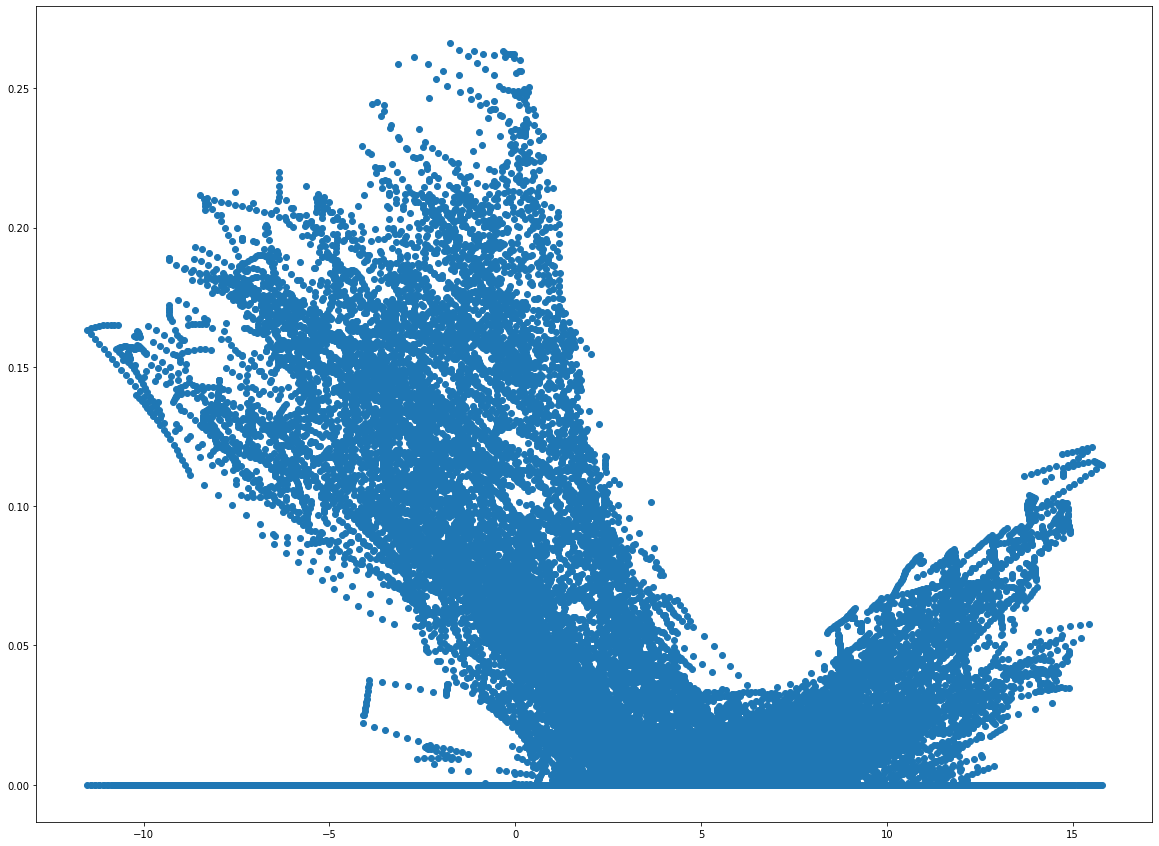

In [90]:
plt.scatter(x=[df.deltaT,df.deltaT],y=[df['Heating Power'],df['Cooling Power']])

In [91]:
model_h = sm.OLS(df['Heating Power'],sm.add_constant(df.deltaT))#for heating
model_c = sm.OLS(df['Cooling Power'],sm.add_constant(df.deltaT)) #for cooling

In [92]:
results_h=model_h.fit()

In [93]:
results_c=model_c.fit()

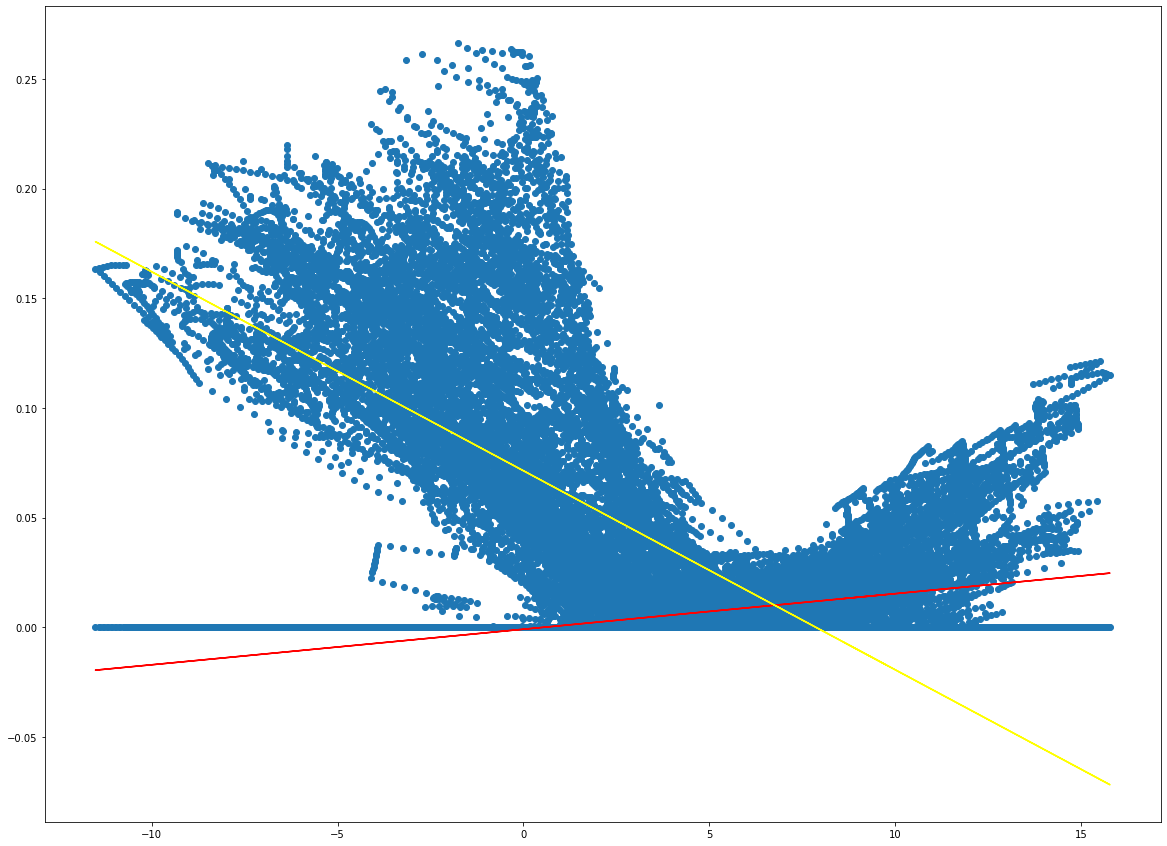

In [94]:
#plt.plot(df.deltaT,results.predict(),'r')
#plt.scatter(df.deltaT,df.Power)
plt.plot(df.deltaT, results_h.predict(), 'red')

plt.plot(df.deltaT, results_c.predict(), 'yellow')

#plt.scatter(df.deltaT,df)
plt.scatter(x=[df.deltaT,df.deltaT],y=[df['Heating Power'],df['Cooling Power']])

In [95]:
results_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Heating Power   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                 1.498e+04
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:10:00   Log-Likelihood:             1.2950e+05
No. Observations:               44543   AIC:                        -2.590e+05
Df Residuals:                   44541   BIC:                        -2.590e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009   8.46e-05    -10.966      0.000      -0.001      -0.001
deltaT         0.0016   1.32e-05    122.374      0.000       0.002       0.002
==============================================================================
Omnibus:                    24355.227   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           211109.040
Skew:                           2.524   Prob(JB):                         0.00
Kurtosis:                      12.395   Cond. No.                         8.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
results_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Cooling Power   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                 6.724e+04
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:10:06   Log-Likelihood:                 86224.
No. Observations:               44543   AIC:                        -1.724e+05
Df Residuals:                   44541   BIC:                        -1.724e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0713      0.000    319.294      0.000       0.071       0.072
deltaT        -0.0091    3.5e-05   -259.314      0.000      -0.009      -0.009
==============================================================================
Omnibus:                     9647.461   Durbin-Watson:                   0.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23984.778
Skew:                           1.195   Prob(JB):                         0.00
Kurtosis:                       5.685   Cond. No.                         8.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Hourly

In [97]:
df=df.resample('H').mean()
df=df.dropna()

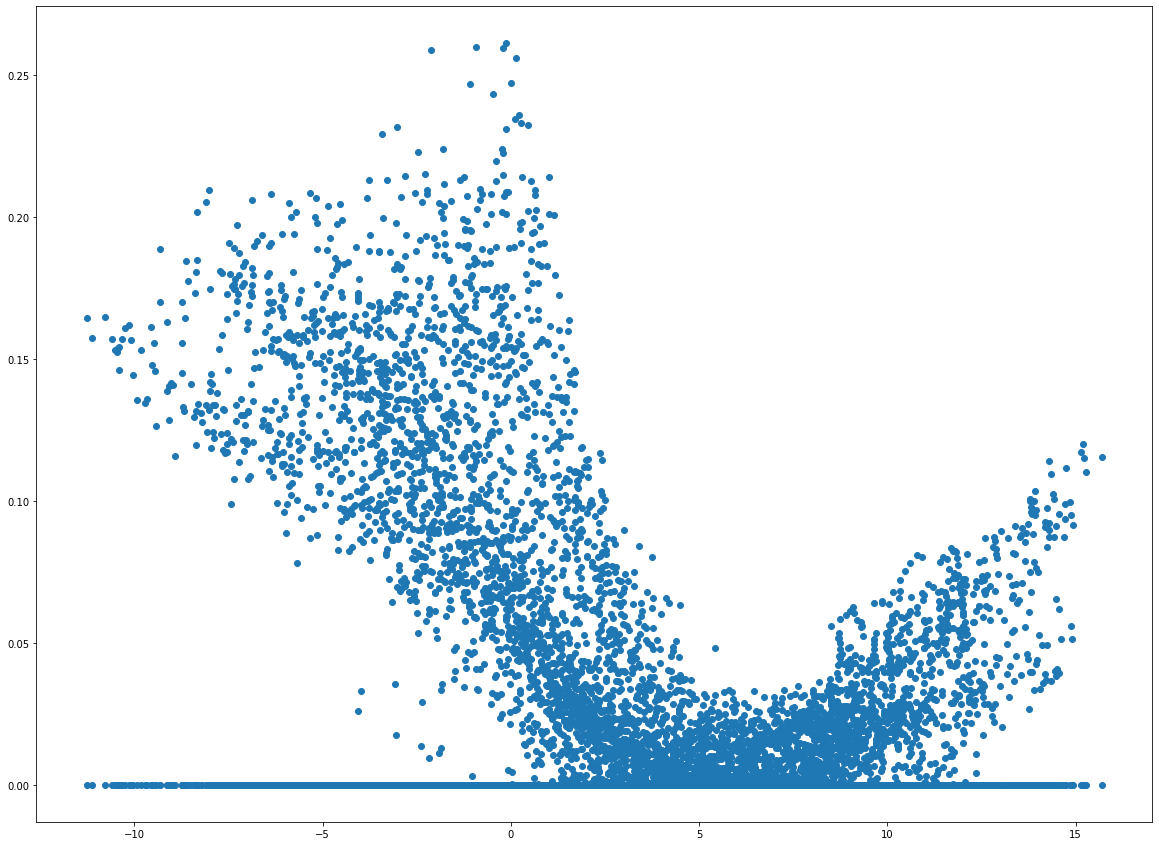

In [98]:
#plt.scatter(df.deltaT,df.Power)
plt.scatter(x=[df.deltaT,df.deltaT],y=[df['Heating Power'],df['Cooling Power']])

In [99]:
#model = sm.OLS(df.Power,sm.add_constant(df.deltaT))
model_h = sm.OLS(df['Heating Power'],sm.add_constant(df.deltaT))#for heating
model_c = sm.OLS(df['Cooling Power'],sm.add_constant(df.deltaT)) #for cooling


In [100]:
#results=model.fit()
results_h=model_h.fit()
results_c=model_c.fit()

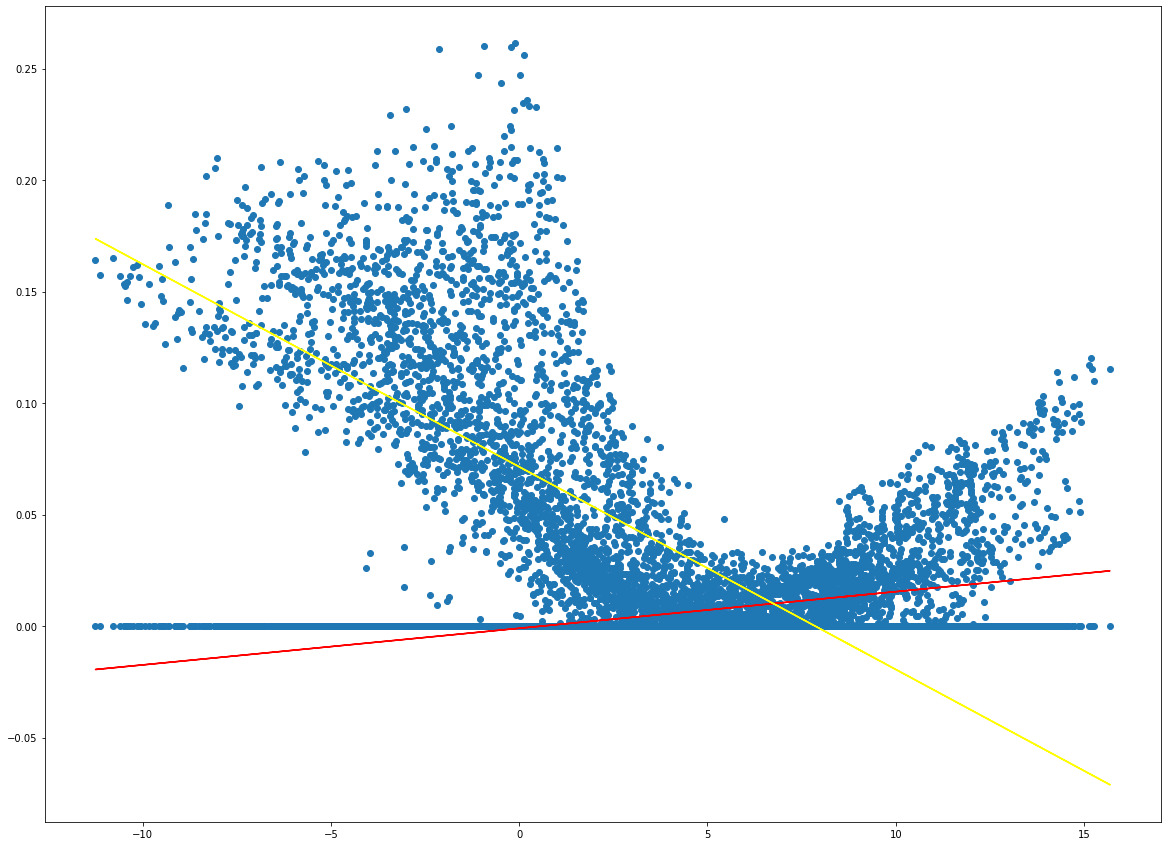

In [101]:
#plt.plot(df.deltaT,results.predict(),'r')
#plt.scatter(df.deltaT,df.Power)
plt.plot(df.deltaT, results_h.predict(), 'red')

plt.plot(df.deltaT, results_c.predict(), 'yellow')

#plt.scatter(df.deltaT,df)
plt.scatter(x=[df.deltaT,df.deltaT],y=[df['Heating Power'],df['Cooling Power']])

In [102]:
results_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Heating Power   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     2660.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:10:47   Log-Likelihood:                 22417.
No. Observations:                7710   AIC:                        -4.483e+04
Df Residuals:                    7708   BIC:                        -4.482e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.000     -4.711      0.000      -0.001      -0.001
deltaT         0.0016   3.18e-05     51.574      0.000       0.002       0.002
==============================================================================
Omnibus:                     4169.226   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35122.194
Skew:                           2.483   Prob(JB):                         0.00
Kurtosis:                      12.202   Cond. No.                         8.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
results_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Cooling Power   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                 1.230e+04
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:10:49   Log-Likelihood:                 15128.
No. Observations:                7710   AIC:                        -3.025e+04
Df Residuals:                    7708   BIC:                        -3.024e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0715      0.001    136.483      0.000       0.070       0.072
deltaT        -0.0091   8.19e-05   -110.888      0.000      -0.009      -0.009
==============================================================================
Omnibus:                     1549.554   Durbin-Watson:                   0.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3643.130
Skew:                           1.129   Prob(JB):                         0.00
Kurtosis:                       5.498   Cond. No.                         8.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Daily

In [104]:
df=df.resample('D').mean()
df=df.dropna()

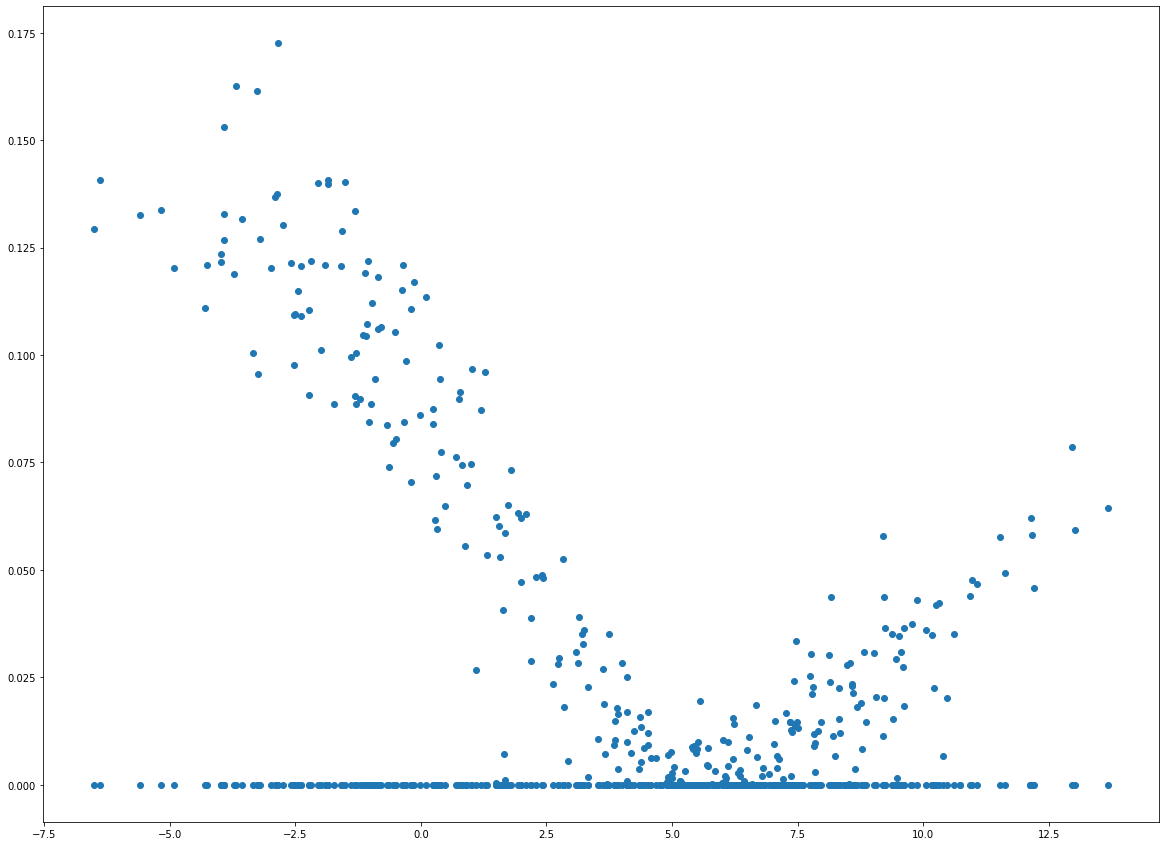

In [105]:
#plt.scatter(df.deltaT,df.Power)
plt.scatter(x=[df.deltaT,df.deltaT],y=[df['Heating Power'],df['Cooling Power']])

In [106]:
#model = sm.OLS(df.Power,sm.add_constant(df.deltaT))
model_h = sm.OLS(df['Heating Power'],sm.add_constant(df.deltaT))#for heating
model_c = sm.OLS(df['Cooling Power'],sm.add_constant(df.deltaT)) #for cooling

In [107]:
results_h=model_h.fit()
results_c=model_c.fit()

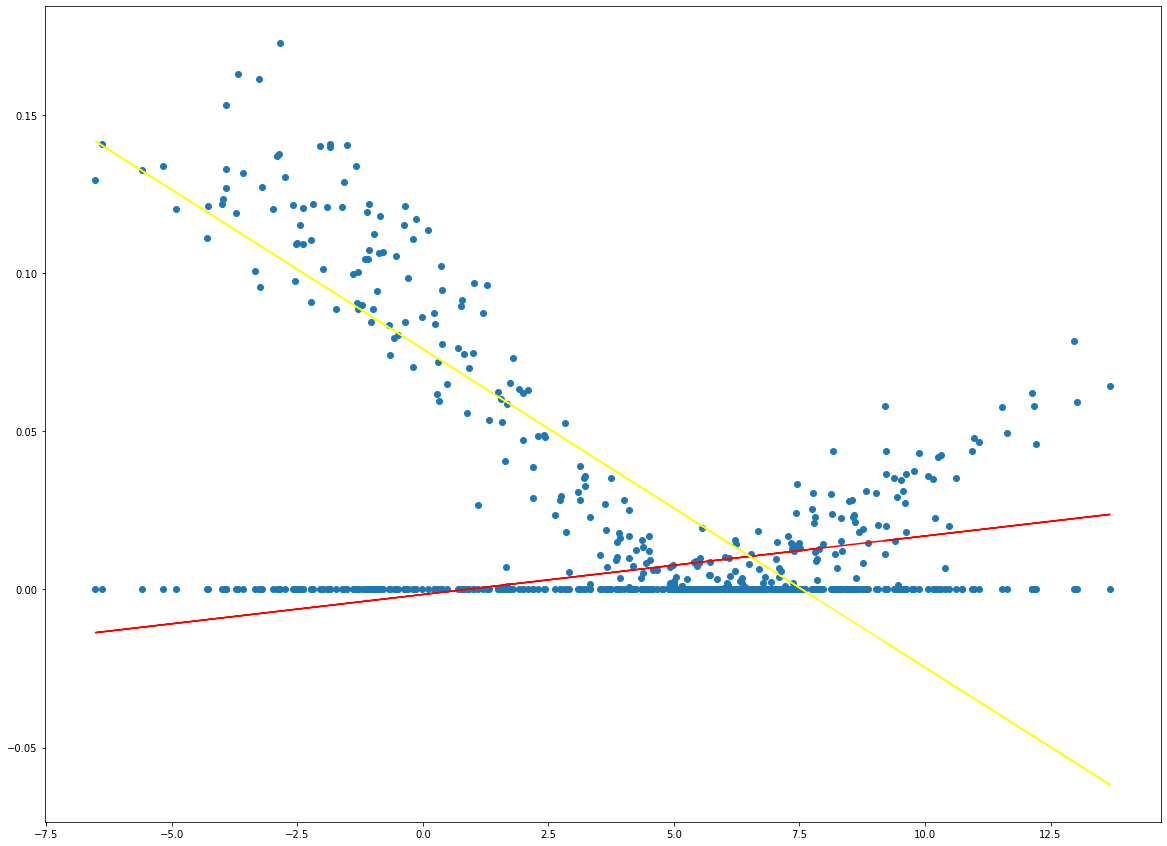

In [108]:
#plt.plot(df.deltaT,results.predict(),'r')
#plt.scatter(df.deltaT,df.Power)
plt.plot(df.deltaT, results_h.predict(), 'red')

plt.plot(df.deltaT, results_c.predict(), 'yellow')

#plt.scatter(df.deltaT,df)
plt.scatter(x=[df.deltaT,df.deltaT],y=[df['Heating Power'],df['Cooling Power']])

In [109]:
results_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Cooling Power   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1402.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          6.73e-127
Time:                        15:11:26   Log-Likelihood:                 884.60
No. Observations:                 366   AIC:                            -1765.
Df Residuals:                     364   BIC:                            -1757.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0760      0.002     46.789      0.000       0.073       0.079
deltaT        -0.0101      0.000    -37.447      0.000      -0.011      -0.010
==============================================================================
Omnibus:                        6.859   Durbin-Watson:                   0.548
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.716
Skew:                           0.325   Prob(JB):                       0.0348
Kurtosis:                       3.131   Cond. No.                         8.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
results_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Heating Power   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     185.2
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.20e-34
Time:                        15:11:27   Log-Likelihood:                 1134.3
No. Observations:                 366   AIC:                            -2265.
Df Residuals:                     364   BIC:                            -2257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.001     -1.944      0.053      -0.003    1.84e-05
deltaT         0.0018      0.000     13.609      0.000       0.002       0.002
==============================================================================
Omnibus:                      119.417   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.148
Skew:                           1.530   Prob(JB):                     2.26e-74
Kurtosis:                       6.588   Cond. No.                         8.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Weekly

In [111]:
df=df.resample('W').mean()
df=df.dropna()

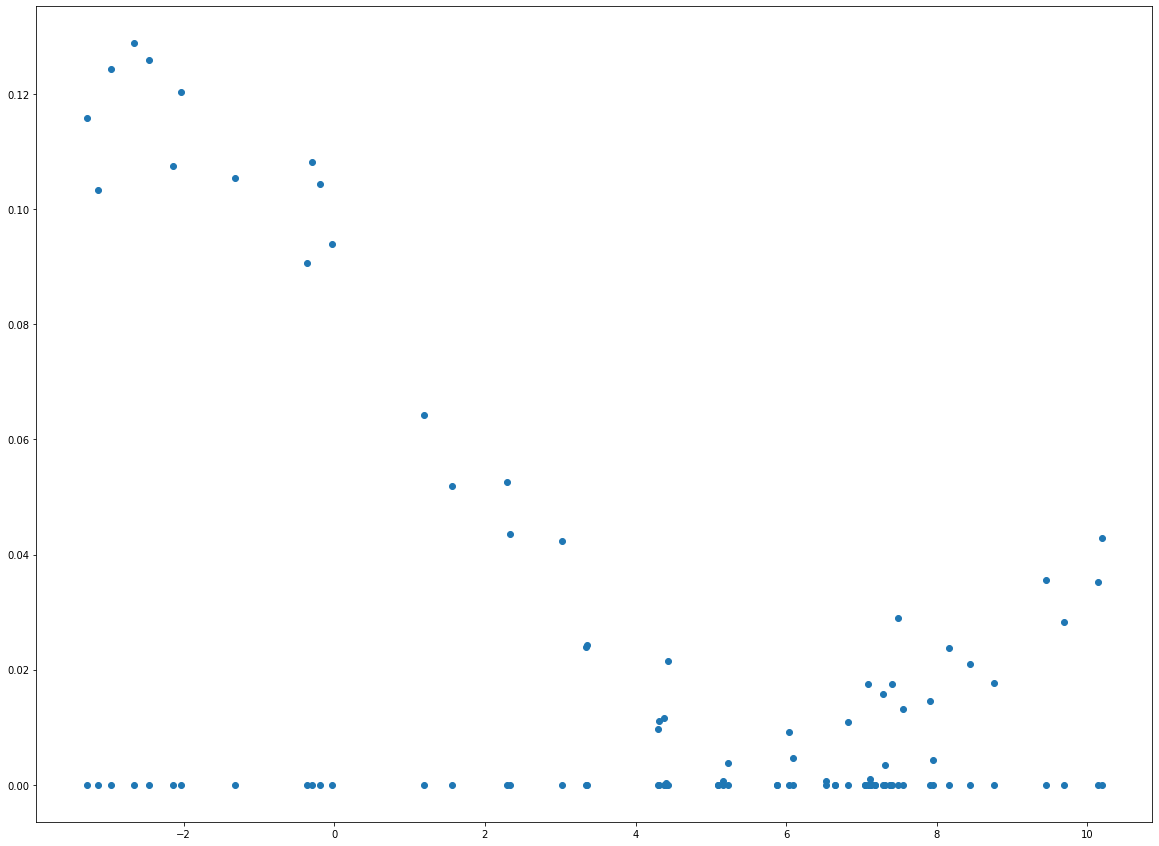

In [112]:
#plt.scatter(df.deltaT,df.Power)
plt.scatter(x=[df.deltaT,df.deltaT],y=[df['Heating Power'],df['Cooling Power']])


In [113]:

model_h = sm.OLS(df['Heating Power'],sm.add_constant(df.deltaT))#for heating
model_c = sm.OLS(df['Cooling Power'],sm.add_constant(df.deltaT)) #for cooling

In [114]:
results_h=model_h.fit()
results_c=model_c.fit()

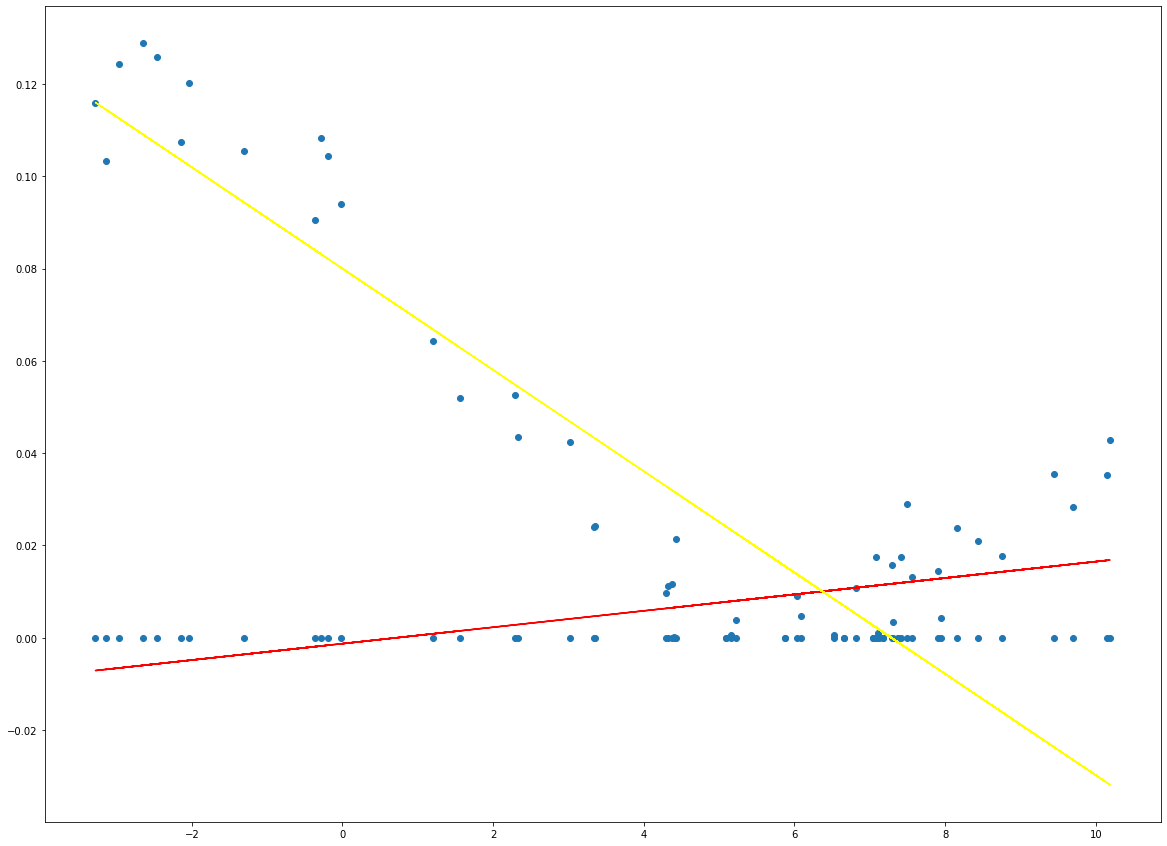

In [115]:
#plt.plot(df.deltaT,results.predict(),'r')
#plt.scatter(df.deltaT,df.Power)
plt.plot(df.deltaT, results_h.predict(), 'red')

plt.plot(df.deltaT, results_c.predict(), 'yellow')

#plt.scatter(df.deltaT,df)
plt.scatter(x=[df.deltaT,df.deltaT],y=[df['Heating Power'],df['Cooling Power']])

In [116]:
results_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Cooling Power   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     401.0
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           8.11e-26
Time:                        15:11:49   Log-Likelihood:                 146.28
No. Observations:                  53   AIC:                            -288.6
Df Residuals:                      51   BIC:                            -284.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0800      0.003     24.848      0.000       0.074       0.086
deltaT        -0.0110      0.001    -20.024      0.000      -0.012      -0.010
==============================================================================
Omnibus:                        1.391   Durbin-Watson:                   1.233
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                1.172
Skew:                           0.167   Prob(JB):                        0.557
Kurtosis:                       2.353   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
results_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Heating Power   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     32.72
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           5.61e-07
Time:                        15:11:50   Log-Likelihood:                 176.36
No. Observations:                  53   AIC:                            -348.7
Df Residuals:                      51   BIC:                            -344.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.002     -0.698      0.488      -0.005       0.002
deltaT         0.0018      0.000      5.720      0.000       0.001       0.002
==============================================================================
Omnibus:                        6.702   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                5.906
Skew:                           0.796   Prob(JB):                       0.0522
Kurtosis:                       3.371   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""